In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**1. 데이터 불러오기**

In [ ]:
ksq1= pd.read_csv("/content/drive/MyDrive/[코스닥]회원사별 거래실적(1일)(주문번호-1301-8)_202202.csv", encoding="cp949")

In [ ]:
ksq2= pd.read_csv("/content/drive/MyDrive/[코스닥]회원사별 거래실적(1일)(주문번호-1301-8)_202202.csv", encoding="cp949")

In [ ]:
ksq3 = pd.read_csv("/content/drive/MyDrive/[코스닥]회원사별 거래실적(1일)(주문번호-1301-8)_202203.csv", encoding="cp949")

In [ ]:
ksq1

,거래일자,시장ID,종목코드,종목명,회원사명,매도체결수량,매도거래대금,매수체결수량,매수거래대금
0,20220203,KSQ,HK0000057197,이스트아시아홀딩스,교보증권,1000,126000,300,37500
1,20220203,KSQ,HK0000057197,이스트아시아홀딩스,신한투자,105880,13215475,119519,15019557
2,20220203,KSQ,HK0000057197,이스트아시아홀딩스,한국증권,23485,2924756,129746,16218451
3,20220203,KSQ,HK0000057197,이스트아시아홀딩스,대신증권,40493,5061695,45861,5751990
4,20220203,KSQ,HK0000057197,이스트아시아홀딩스,미래에셋증권,312425,39196399,105500,13168285
...,...,...,...,...,...,...,...,...,...
771801,20220228,KSQ,KYG3931T1076,글로벌에스엠,하나금융투자,1456,1395096,6575,6295284
771802,20220228,KSQ,KYG3931T1076,글로벌에스엠,이베스트,77,73899,41,39172
771803,20220228,KSQ,KYG3931T1076,글로벌에스엠,IBK증권,0,0,10,9550
771804,20220228,KSQ,KYG3931T1076,글로벌에스엠,다올투자증권,0,0,690,658950


In [ ]:
ksq = pd.concat([ksq1, ksq2, ksq3])

**2. 데이터 전처리**

2-1. 새로운 칼럼 "체결수량" , "거래대금" 생성

In [ ]:
ksq["체결수량"] = ksq["매수체결수량"]+ksq["매도체결수량"]
ksq["거래대금"] = ksq["매수거래대금"]+ksq["매도거래대금"]

In [ ]:
ksq

,거래일자,시장ID,종목코드,종목명,회원사명,매도체결수량,매도거래대금,매수체결수량,매수거래대금,체결수량,거래대금
0,20220203,KSQ,HK0000057197,이스트아시아홀딩스,교보증권,1000,126000,300,37500,1300,163500
1,20220203,KSQ,HK0000057197,이스트아시아홀딩스,신한투자,105880,13215475,119519,15019557,225399,28235032
2,20220203,KSQ,HK0000057197,이스트아시아홀딩스,한국증권,23485,2924756,129746,16218451,153231,19143207
3,20220203,KSQ,HK0000057197,이스트아시아홀딩스,대신증권,40493,5061695,45861,5751990,86354,10813685
4,20220203,KSQ,HK0000057197,이스트아시아홀딩스,미래에셋증권,312425,39196399,105500,13168285,417925,52364684
...,...,...,...,...,...,...,...,...,...,...,...
919678,20220331,KSQ,KYG3931T1076,글로벌에스엠,키움증권,98249,90384187,84959,78320191,183208,168704378
919679,20220331,KSQ,KYG3931T1076,글로벌에스엠,하나금융투자,2126,1967246,117,107563,2243,2074809
919680,20220331,KSQ,KYG3931T1076,글로벌에스엠,이베스트,914,842680,30,27580,944,870260
919681,20220331,KSQ,KYG3931T1076,글로벌에스엠,IBK증권,0,0,0,0,0,0


2-2. 칼럼 간 상관관계 확인

In [ ]:
ksq_co = ksq.copy()

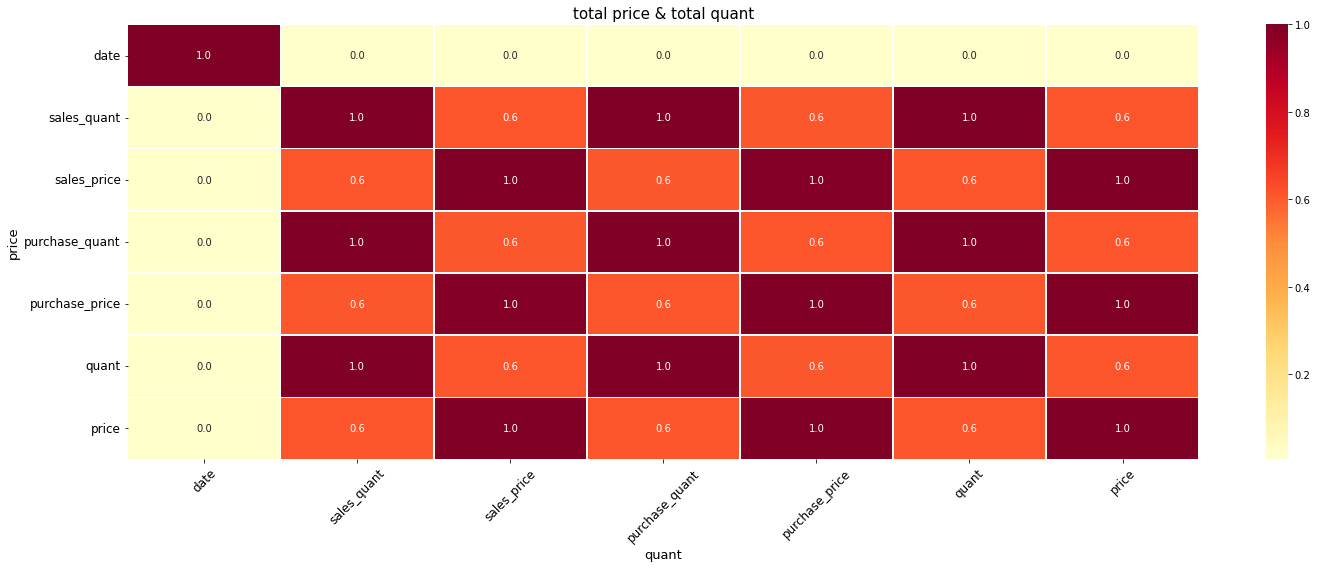

In [ ]:
ksq_co.corr()

ksq_co.rename(columns = {'거래일자': 'date','종목코드': 'code','회원사명': 'member','매도체결수량': 'sales_quant', '매도거래대금': 'sales_price','매수체결수량': 'purchase_quant','매수거래대금': 'purchase_price', "거래대금":"price", "체결수량":"quant"}, inplace = True)

fig, ax = plt.subplots(figsize=(24,8))

sns.heatmap(ksq_co.corr(),
            annot = True,
            ax = ax,
            linewidths = 0.4,
            linecolor = 'white',
            fmt = '.1f',
            cmap = 'YlOrRd')

plt.title('total price & total quant', size = 15)
plt.ylabel('price', size = 13)
plt.xlabel('quant', size = 13)

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12)
plt.show()

2-3. 거래일자, 종목별로 데이터프레임생성

In [ ]:
ksq_group = pd.DataFrame(ksq.groupby(["거래일자","종목명"])["체결수량"].sum())

In [ ]:
ksq_group

체결수량
거래일자     종목명            
20220203 3S      5877196
         APS홀딩스   148648
         AP시스템    451624
         AP위성     358840
         CBI     1155732
...                  ...
20220331 흥구석유    2515954
         흥국       115980
         흥국에프엔비   700806
         희림      1462136
         힘스        24230

[57364 rows x 1 columns]

In [ ]:
ksq_group = ksq_group.reset_index()

2-4. 전체 체결량 상위 종목 확인

In [ ]:
ksq_group_suc = ksq_group.groupby("종목명")["체결수량"].sum()

In [ ]:
ksq_group_suc.sort_values(ascending=False)[:10]

종목명
팜스토리         4030371918
피에이치씨        3938528752
휴림로봇         3924519320
이스트아시아홀딩스    3572666356
지에스이         3567591678
보성파워텍        1778212002
로스웰          1615436606
제주맥주         1468093610
자연과환경        1431845090
미래생명자원       1411205566
Name: 체결수량, dtype: int64

2-5. 체결량 상위 5개 종목별 데이터프레임 생성

In [ ]:
ksq_parm = ksq_group[ksq_group["종목명"]=="팜스토리"]
ksq_bs = ksq_group[ksq_group["종목명"]=="보성파워텍"]
ksq_hurim = ksq_group[ksq_group["종목명"]=="휴림로봇"]
ksq_east = ksq_group[ksq_group["종목명"]=="이스트아시아홀딩스"]
ksq_gse = ksq_group[ksq_group["종목명"]=="지에스이"]


2-6. 종목별 데이터 프레임 전처리

In [ ]:
# 팜스토리
ksq_parm = ksq_parm.drop(columns = ["종목명"])
ksq_parm.columns

from datetime import datetime
ksq_parm["거래일자"]=ksq_parm["거래일자"].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d"))

ksq_parm.columns=["ds", "y"]

In [ ]:
# 보성파워텍
ksq_bs = ksq_bs.drop(columns = ["종목명"])
ksq_bs.columns

from datetime import datetime
ksq_bs["거래일자"]=ksq_bs["거래일자"].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d"))

ksq_bs.columns=["ds", "y"]

In [ ]:
# 휴림로봇
ksq_hurim = ksq_hurim.drop(columns = ["종목명"])
ksq_hurim.columns

from datetime import datetime
ksq_hurim["거래일자"]=ksq_hurim["거래일자"].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d"))

ksq_hurim.columns=["ds", "y"]

In [ ]:
# 이스트아시아홀딩스
ksq_east = ksq_east.drop(columns = ["종목명"])
ksq_east.columns

from datetime import datetime
ksq_east["거래일자"]=ksq_east["거래일자"].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d"))

ksq_east.columns=["ds", "y"]

In [ ]:
# 지에스이
ksq_gse = ksq_gse.drop(columns = ["종목명"])
ksq_gse.columns

from datetime import datetime
ksq_gse["거래일자"]=ksq_gse["거래일자"].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d"))

ksq_gse.columns=["ds", "y"]

**3. 모델 생성 및 시각화**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


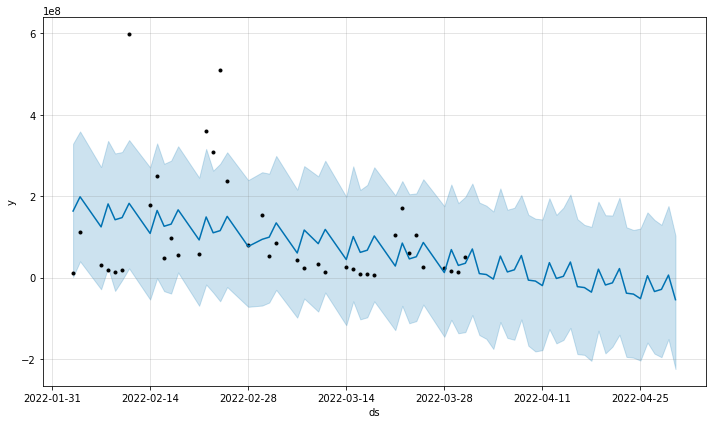

In [ ]:
from fbprophet import Prophet
model1 = Prophet(daily_seasonality=True)
model1.add_country_holidays(country_name="KR")

model1.fit(ksq_parm)

fcast_time = 30
ksq_forecast1 = model1.make_future_dataframe(periods=fcast_time, freq="d")
ksq_forecast1.tail(10)

# ksq_forecast1["floor"] = 6500000
# ksq_forecast1["cap"] = 700000000

ksq_forecast1= model1.predict(ksq_forecast1)



model1.plot(ksq_forecast1)
plt.show()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


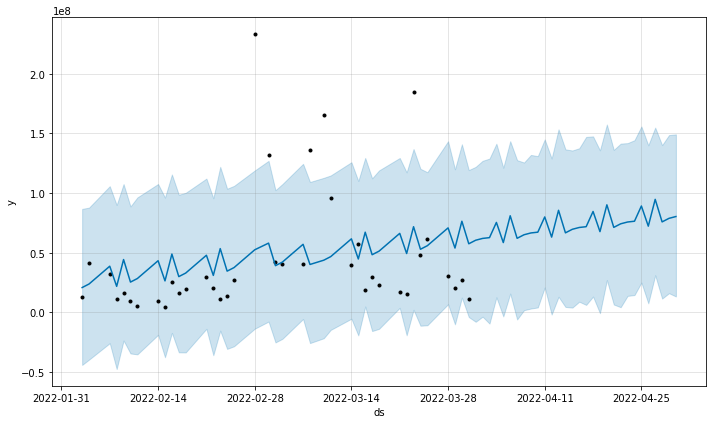

In [ ]:
# 보성파워텍
from fbprophet import Prophet
model2 = Prophet(daily_seasonality=True)
model2.add_country_holidays(country_name="KR")

model2.fit(ksq_bs)

fcast_time = 30
ksq_forecast2 = model2.make_future_dataframe(periods=fcast_time, freq="d")
ksq_forecast2.tail(10)

ksq_forecast2= model2.predict(ksq_forecast2)

model2.plot(ksq_forecast2)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


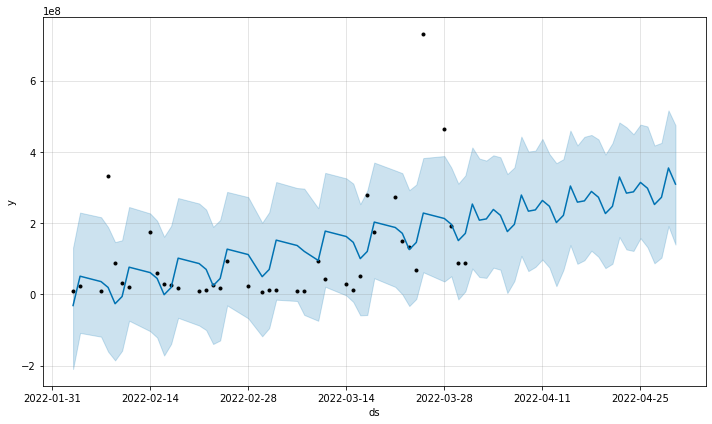

In [ ]:
# 휴림로봇
from fbprophet import Prophet
model3 = Prophet(daily_seasonality=True)
model3.add_country_holidays(country_name="KR")

model3.fit(ksq_hurim)

fcast_time = 30
ksq_forecast3 = model3.make_future_dataframe(periods=fcast_time, freq="d")
ksq_forecast3.tail(10)

ksq_forecast3= model3.predict(ksq_forecast3)

model3.plot(ksq_forecast3)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


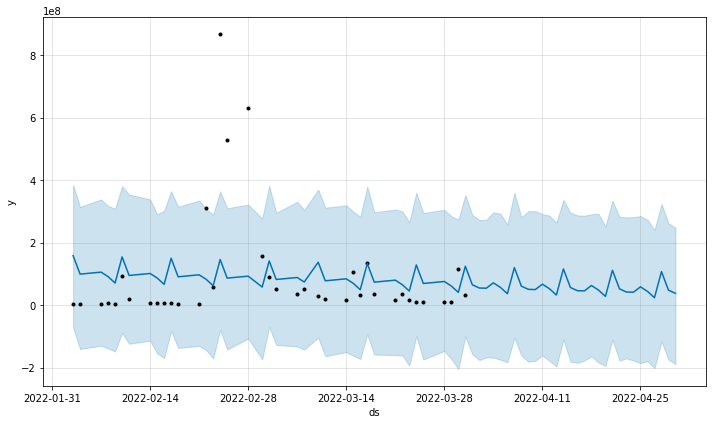

In [ ]:
# 이스트아시아홀딩스
from fbprophet import Prophet
model4 = Prophet(daily_seasonality=True)
model4.add_country_holidays(country_name="KR")

model4.fit(ksq_east)

fcast_time = 30
ksq_forecast4 = model4.make_future_dataframe(periods=fcast_time, freq="d")
ksq_forecast4.tail(10)

ksq_forecast4= model4.predict(ksq_forecast4)

model4.plot(ksq_forecast4)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


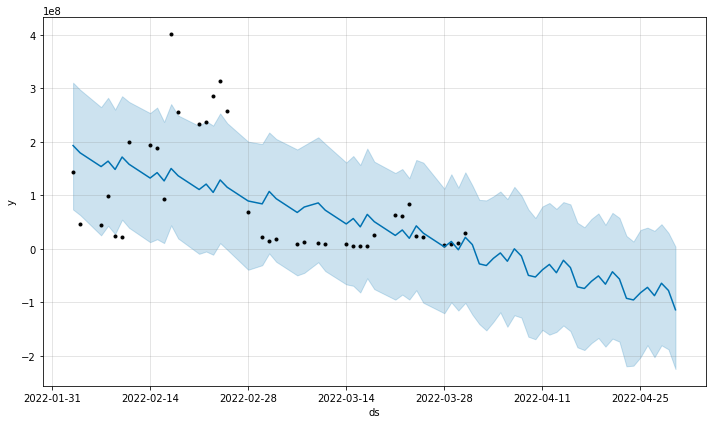

In [ ]:
# 지에스이
from fbprophet import Prophet
model5 = Prophet(daily_seasonality=True)
model5.add_country_holidays(country_name="KR")

model5.fit(ksq_gse)

fcast_time = 30
ksq_forecast5 = model5.make_future_dataframe(periods=fcast_time, freq="d")
ksq_forecast5.tail(10)

ksq_forecast5= model5.predict(ksq_forecast5)

model5.plot(ksq_forecast5)
plt.show()